In [1]:
#%% import pakages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import pickle

In [2]:
df_dataset=pd.read_excel('NotebooksGraphs(only bar charts).xlsx', sheet_name='rawData', index_col=0)
df_dataset = df_dataset.rename(columns={'meter_reading':'data points'})
df_dataset['site_id'] = 'site' + df_dataset['site_id'].astype('str')
df_dataset

,site_id,building_id,primary_use,square_feet,year_built,floor_count,meter,data points,meter_type
0,site0,0,Education,7432,2008.0,NaN,0,8784,Electricity
1,site0,1,Education,2720,2004.0,NaN,0,8784,Electricity
2,site0,2,Education,5376,1991.0,NaN,0,8784,Electricity
3,site0,3,Education,23685,2002.0,NaN,0,8784,Electricity
4,site0,4,Education,116607,1975.0,NaN,0,8784,Electricity
...,...,...,...,...,...,...,...,...,...
2375,site15,1444,Entertainment/public assembly,19619,1914.0,NaN,0,7445,Electricity
2376,site15,1445,Education,4298,NaN,NaN,0,7449,Electricity
2377,site15,1446,Entertainment/public assembly,11265,1997.0,NaN,0,7472,Electricity
2378,site15,1447,Lodging/residential,29775,2001.0,NaN,0,7471,Electricity


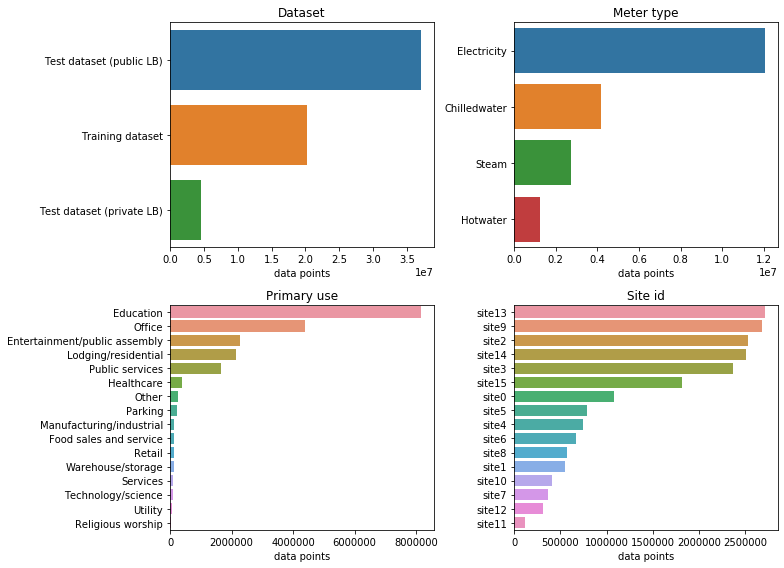

In [3]:
nr_rows = 2
nr_cols = 2

cols_review = ['home_ownership', 'verification_status', 'loan_status']

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*5.5,nr_rows*4))

#Fig 1: data points of each dataset
df_dataset_plot = pd.DataFrame(data=[20212600, 37110864, 4586736], 
                               index=['Training dataset','Test dataset (public LB)','Test dataset (private LB)'],
                               columns=['data points']).sort_values('data points', ascending=False).reset_index()
df_dataset_plot.rename(columns={'index':'dataset'}, inplace=True)
ax1 = sns.barplot(y="dataset", x="data points", 
                  data=df_dataset_plot,ax = axs[0][0])
ax1.title.set_text("Dataset")
ax1.set_ylabel('')

#Fig 2: data points of each meter type
df_meterType_plot = df_dataset[['meter_type','data points']].groupby('meter_type').sum().sort_values('data points', ascending=False).reset_index()
df_meterType_plot.rename(columns={'meter_type':'meter type'}, inplace=True)
ax2 = sns.barplot(y="meter type", x="data points", 
            data=df_meterType_plot,ax = axs[0][1])
ax2.title.set_text("Meter type")
ax2.set_ylabel('')

#Fig 3: data points of each primary use
df_primaryUse_plot = df_dataset[['primary_use','data points']].groupby('primary_use').sum().sort_values('data points', ascending=False).reset_index()
df_primaryUse_plot.rename(columns={'primary_use':'primary use'}, inplace=True)
ax3 = sns.barplot(y="primary use", x="data points", 
            data=df_primaryUse_plot,ax = axs[1][0])
ax3.title.set_text("Primary use")
ax3.set_ylabel('')

#Fig 4: data points in each site
df_siteID_plot = df_dataset[['site_id','data points']].groupby('site_id').sum().sort_values('data points', ascending=False).reset_index()
df_siteID_plot.rename(columns={'site_id':'site id'}, inplace=True)
ax4 = sns.barplot(y="site id", x="data points", 
            data=df_siteID_plot,ax = axs[1][1])
ax4.title.set_text("Site id")
ax4.set_ylabel('')

plt.tight_layout()    
plt.show()

fig.savefig("dataset_datapoints.png", dpi=300)

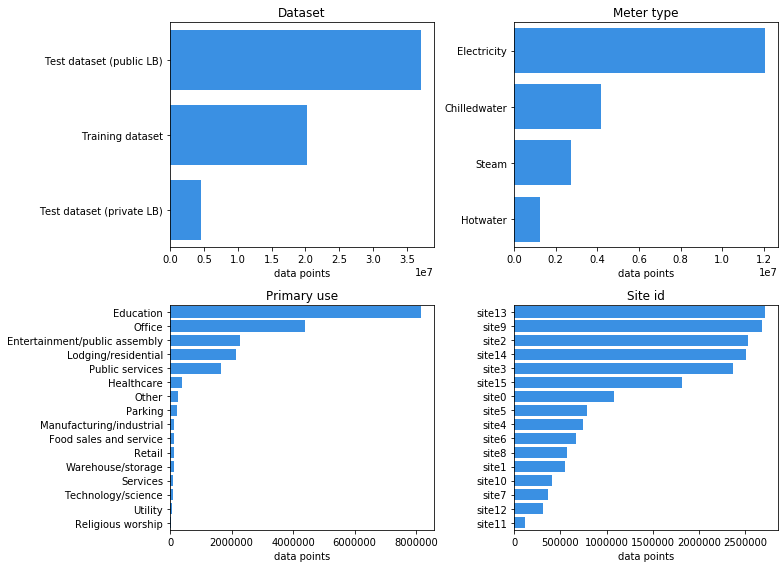

In [4]:
color = "dodgerblue"
nr_rows = 2
nr_cols = 2

cols_review = ['home_ownership', 'verification_status', 'loan_status']

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*5.5,nr_rows*4))

#Fig 1: data points of each dataset
df_dataset_plot = pd.DataFrame(data=[20212600, 37110864, 4586736], 
                               index=['Training dataset','Test dataset (public LB)','Test dataset (private LB)'],
                               columns=['data points']).sort_values('data points', ascending=False).reset_index()
df_dataset_plot.rename(columns={'index':'dataset'}, inplace=True)
ax1 = sns.barplot(y="dataset", x="data points", 
                  data=df_dataset_plot,ax = axs[0][0],color=color)
ax1.title.set_text("Dataset")
ax1.set_ylabel('')

#Fig 2: data points of each meter type
df_meterType_plot = df_dataset[['meter_type','data points']].groupby('meter_type').sum().sort_values('data points', ascending=False).reset_index()
df_meterType_plot.rename(columns={'meter_type':'meter type'}, inplace=True)
ax2 = sns.barplot(y="meter type", x="data points", 
            data=df_meterType_plot,ax = axs[0][1],color=color)
ax2.title.set_text("Meter type")
ax2.set_ylabel('')

#Fig 3: data points of each primary use
df_primaryUse_plot = df_dataset[['primary_use','data points']].groupby('primary_use').sum().sort_values('data points', ascending=False).reset_index()
df_primaryUse_plot.rename(columns={'primary_use':'primary use'}, inplace=True)
ax3 = sns.barplot(y="primary use", x="data points", 
            data=df_primaryUse_plot,ax = axs[1][0],color=color)
ax3.title.set_text("Primary use")
ax3.set_ylabel('')

#Fig 4: data points in each site
df_siteID_plot = df_dataset[['site_id','data points']].groupby('site_id').sum().sort_values('data points', ascending=False).reset_index()
df_siteID_plot.rename(columns={'site_id':'site id'}, inplace=True)
ax4 = sns.barplot(y="site id", x="data points", 
            data=df_siteID_plot,ax = axs[1][1],color=color)
ax4.title.set_text("Site id")
ax4.set_ylabel('')

plt.tight_layout()    
plt.show()

#fig.savefig("dataset_datapoints", dpi=300)

In [5]:
df_notebooks_noTagged=pd.read_pickle('ASHRAE-Kaggle_notebooks_meta.pkl')
df_notebooks=pd.read_excel('ASHRAE-Kaggle_notebooks_meta(Tagged).xlsx', )
df_notebooks = df_notebooks.drop(['title','tags','data'],axis=1).merge(df_notebooks_noTagged[['title','scriptUrl', 'tags', 'data']], on='scriptUrl')
df_notebooks

,scriptUrl,languageName,bestPublicScore,isGpuEnabled,lastRunExecutionTimeSeconds,medal,totalComments,totalForks,totalViews,totalVotes,Models\t,EDA,Cleaning\t,Visualization\t,Feature Engineering,Leak data usage,title,tags,data
0,https://www.kaggle.com/rohanrao/ashrae-half-an...,Python,1.100,False,3115,gold,73,0,0,364,gradient boosting,0.0,0.0,0.0,0.0,0,ASHRAE: Half and Half,"[beginner, gradient boosting, regression, star...","[ASHRAE - Great Energy Predictor III, nan, nan..."
1,https://www.kaggle.com/caesarlupum/ashrae-star...,Python,NaN,False,861,gold,200,0,0,756,NaN,1.0,1.0,1.0,0.0,0,🔌⚡ASHRAE -Start Here: A GENTLE Introduction,"[beginner, data cleaning, data visualization, ...","[ASHRAE - Great Energy Predictor III, nan, nan..."
2,https://www.kaggle.com/nroman/eda-for-ashrae,Python,NaN,False,779,gold,48,0,0,386,NaN,1.0,0.0,0.0,0.0,0,EDA for ASHRAE,"[nan, nan, nan, nan, nan]","[ASHRAE - Great Energy Predictor III, nan, nan..."
3,https://www.kaggle.com/corochann/ashrae-traini...,Python,1.121,False,3382,gold,57,0,0,279,gradient boosting,0.0,0.0,0.0,1.0,0,ASHRAE: Training LGBM by meter type,"[tutorial, ensembling, feature engineering, gr...","[ASHRAE - Great Energy Predictor III, ASHRAE: ..."
4,https://www.kaggle.com/aitude/ashrae-kfold-lig...,Python,1.080,False,3830,gold,44,0,0,220,gradient boosting,0.0,1.0,0.0,1.0,0,ASHRAE- KFold LightGBM - without leak (1.08),"[data cleaning, ensembling, feature engineerin...","[ASHRAE - Great Energy Predictor III, nan, nan..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410,https://www.kaggle.com/vladimirsydor/bland-lgb...,Python,NaN,False,411,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,1,Bland LGBM on PP + Leaks Train + FE,"[nan, nan, nan, nan, nan]","[ASHRAE - Great Energy Predictor III, LGBM on ..."
411,https://www.kaggle.com/vladimirsydor/bland-lgb...,Python,1.010,False,539,NaN,0,0,0,0,NaN,0.0,0.0,0.0,0.0,1,Bland LGBM on Leaks,"[nan, nan, nan, nan, nan]","[ASHRAE - Great Energy Predictor III, LGBM on ..."
412,https://www.kaggle.com/vladimirsydor/bland-lgb...,Python,1.070,False,452,NaN,0,0,0,0,Model stacking,0.0,0.0,0.0,0.0,0,Bland LGBM Folds,"[nan, nan, nan, nan, nan]","[ASHRAE - Great Energy Predictor III, LGBM Fol..."
413,https://www.kaggle.com/vladimirsydor/lgbm-fold-1,Python,NaN,False,17021,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0,LGBM Fold 1,"[nan, nan, nan, nan, nan]","[ASHRAE - Great Energy Predictor III, Baseline..."


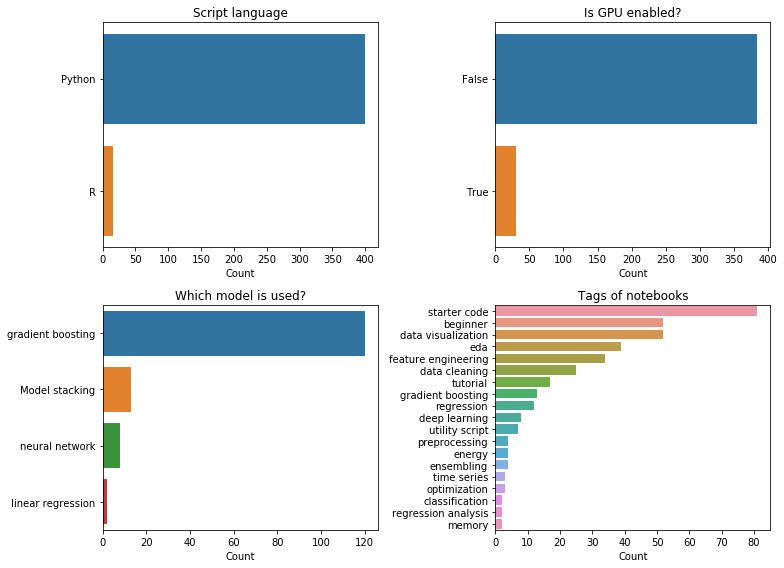

In [6]:
nr_rows = 2
nr_cols = 2

cols_review = ['home_ownership', 'verification_status', 'loan_status']

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*5.5,nr_rows*4))

#Fig 1: Script language
colName='languageName'
title='Script language'

df_temp = df_notebooks[colName].value_counts().sort_values(ascending=False)
df_temp = pd.DataFrame(df_temp)
df_temp.columns = ['Count']
df_temp = df_temp.reset_index()
df_temp.rename(columns={'index':colName}, inplace=True)
ax1 = sns.barplot(y=colName, x="Count", data=df_temp, ax = axs[0][0])
ax1.title.set_text(title)
ax1.set_ylabel('')

#Fig 2: Is GPU enabled?
colName='isGpuEnabled'
title='Is GPU enabled?'

df_temp = df_notebooks[colName].value_counts().sort_values(ascending=False)
df_temp = pd.DataFrame(df_temp)
df_temp.columns = ['Count']
df_temp = df_temp.reset_index()
df_temp.rename(columns={'index':colName}, inplace=True)
df_temp['isGpuEnabled'] = df_temp['isGpuEnabled'].astype('str')
plt.title(title)
ax2 = sns.barplot(y=colName, x="Count", data=df_temp, ax = axs[0][1])
ax2.title.set_text(title)
ax2.set_ylabel('')

#Fig 3: Which model is used?
colName='Models\t'
title='Which model is used?'

df_temp = df_notebooks[colName].value_counts().sort_values(ascending=False)
df_temp = pd.DataFrame(df_temp)
df_temp.columns = ['Count']
df_temp = df_temp.reset_index()
df_temp.rename(columns={'index':colName}, inplace=True)
ax3 = sns.barplot(y=colName, x="Count", data=df_temp, ax = axs[1][0])
ax3.title.set_text(title)
ax3.set_ylabel('')

#Fig 4: Tags of notebooks
colName='tag'
title = 'Tags of notebooks'

list_tags = np.reshape(df_notebooks['tags'].to_list(), (1,-1)).tolist()[0]
dict_tags = {tag:list_tags.count(tag) for tag in list_tags}
df_tags_count = pd.DataFrame.from_dict(dict_tags, orient='index').sort_values(0, ascending=False).drop('nan')
df_tags_count = df_tags_count.reset_index().rename(columns={'index':'tag', 0:'Count'})
df_tags_count = df_tags_count[df_tags_count['Count']>1]
df_tags_count

ax4 = sns.barplot(y=colName, x="Count", data=df_tags_count, ax = axs[1][1])
ax4.title.set_text(title)
ax4.set_ylabel('')

plt.tight_layout()    
plt.show()

fig.savefig("notebook_summary.png", dpi=300)

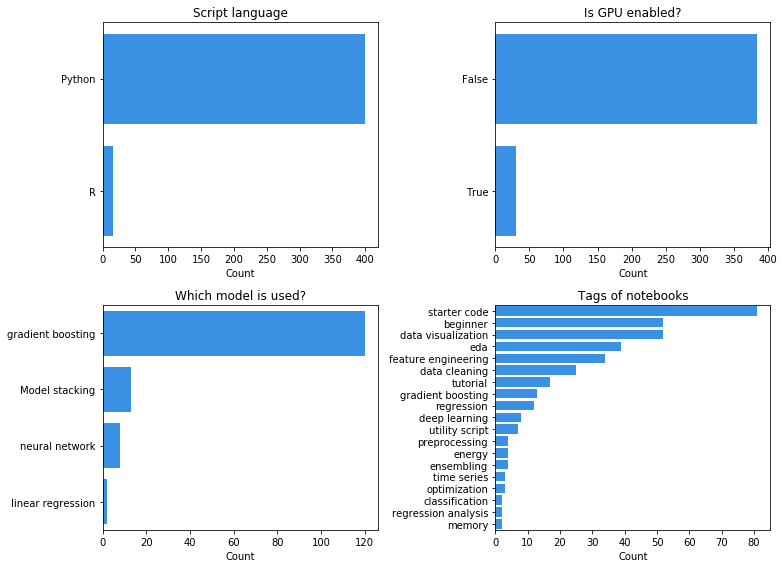

In [7]:
color = "dodgerblue"

nr_rows = 2
nr_cols = 2

cols_review = ['home_ownership', 'verification_status', 'loan_status']

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*5.5,nr_rows*4))

#Fig 1: Script language
colName='languageName'
title='Script language'

df_temp = df_notebooks[colName].value_counts().sort_values(ascending=False)
df_temp = pd.DataFrame(df_temp)
df_temp.columns = ['Count']
df_temp = df_temp.reset_index()
df_temp.rename(columns={'index':colName}, inplace=True)
ax1 = sns.barplot(y=colName, x="Count", data=df_temp, ax = axs[0][0], color=color)
ax1.title.set_text(title)
ax1.set_ylabel('')

#Fig 2: Is GPU enabled?
colName='isGpuEnabled'
title='Is GPU enabled?'

df_temp = df_notebooks[colName].value_counts().sort_values(ascending=False)
df_temp = pd.DataFrame(df_temp)
df_temp.columns = ['Count']
df_temp = df_temp.reset_index()
df_temp.rename(columns={'index':colName}, inplace=True)
df_temp['isGpuEnabled'] = df_temp['isGpuEnabled'].astype('str')
plt.title(title)
ax2 = sns.barplot(y=colName, x="Count", data=df_temp, ax = axs[0][1], color=color)
ax2.title.set_text(title)
ax2.set_ylabel('')

#Fig 3: Which model is used?
colName='Models\t'
title='Which model is used?'

df_temp = df_notebooks[colName].value_counts().sort_values(ascending=False)
df_temp = pd.DataFrame(df_temp)
df_temp.columns = ['Count']
df_temp = df_temp.reset_index()
df_temp.rename(columns={'index':colName}, inplace=True)
ax3 = sns.barplot(y=colName, x="Count", data=df_temp, ax = axs[1][0], color=color)
ax3.title.set_text(title)
ax3.set_ylabel('')

#Fig 4: Tags of notebooks
colName='tag'
title = 'Tags of notebooks'

list_tags = np.reshape(df_notebooks['tags'].to_list(), (1,-1)).tolist()[0]
dict_tags = {tag:list_tags.count(tag) for tag in list_tags}
df_tags_count = pd.DataFrame.from_dict(dict_tags, orient='index').sort_values(0, ascending=False).drop('nan')
df_tags_count = df_tags_count.reset_index().rename(columns={'index':'tag', 0:'Count'})
df_tags_count = df_tags_count[df_tags_count['Count']>1]
df_tags_count

ax4 = sns.barplot(y=colName, x="Count", data=df_tags_count, ax = axs[1][1], color=color)
ax4.title.set_text(title)
ax4.set_ylabel('')

plt.tight_layout()    
plt.show()

#fig.savefig("notebook_summary.png", dpi=300)